# **Bike Sharing**

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

### **Context**

Bike sharing adalah sebuah sistem transportasi dimana sepeda-sepeda yang disediakan oleh penyedia layanan dapat dipinjam dan digunakan oleh masyarakat umum. Sistem ini memungkinkan orang untuk menyewa sepeda untuk jangka waktu tertentu, biasanya beberapa jam atau bahkan beberapa hari.

Cara kerja bike sharing biasanya menggunakan teknologi teretntu. Para pengguna dapat mendaftarkan diri mereka pada aplikasi atau situs web penyedia. Setelah itu pengguna bisa mencari lokasi sepeda yang tersedia dengan membuka kunci atau mengakses suatu kode verifikasi yang diberikan oleh penyedia dan langsung bisa melakukan perjalanan mereka.


### **Problem Statement**

Selain bisa memberikan manfaat seperti transportasi ramah lingkungan, solusi kepadatan lalu lintas, aksesbilitas, dan hal lainnya. Para penyedia bike sharing ini mendapatkan suatu tantangan tersendiri yaitu bagaimana untuk mengetahui berapa banyak sepeda yang harus di distribusikan agar sepeda yang tersedia tidak dalam kondisi kekurangan maupun dalam kondisi terlalu banyak.
Menyediakan jumlah sepeda yang cukup dalam berbagai situasi dan kondisi. Jika menyediakan sepeda terlalu banyak, maka akan berdampak pada biaya penyedia. Jika kekurangan jumlah sepeda maka penedia gagal dalam memenuhi kebutuhan dari pengguna. 

### **Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan pada kondisi-kondisi tertentu. 
Selanjutnya, kita akan membangun suatu model regresi yang akan membantu penyedia untuk dapat menyediakan 'tool' prediksi jumlah sepeda yang perlu didistribusikan berdasarkan kondisi-kondisi tertentu.


### **Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi jumlah sepeda yg didistribusikan sesuai dengan limitasi fitur yang digunakan.

## **Data Understanding**

* Dataset menunjukkan data sewa sepeda per jam selama dua tahun (2011 dan 2012). 
* Memiliki 11 kolom yang masing-masing menunjukan waktu penyewaan, kondisi lingkungan, dan banyaknya sepeda yang disewa

**Attributes Information**

|Atribute|Data Type|Description|
|---|---|---|
|dteday|Datetime|Date|
|hum|Float|Normalized Humadity. The values are divided to 100 (maximum value)|
|weathersit|Integer|1: Clear, few clouds, partly cloudy<br>2: Mist and cloudy, mist and broken clouds, mist and few clouds, mist<br>3: Light snow, light rain and thunderstorm and scattered clouds, light rain and scattered clouds<br>4: Heavy rain and ice pallets and thunderstorm and mist, snow and fog|
|holiday|Integer|Whether the day is holiday or not (1: holiday, 0: not holiday). |
|season|Integer|Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)|
|atemp|Float|Normalized feeling temperature in Celsius. The values are divided to 50 (maximum value)|
|temp|Float|Normalized temperature in Celsius. The values are divided to 39 (maximum value)|
|hr|Integer|Hour (0 to 23)|
|casual|Integer|Count of casual users|
|registered|Integer|Count of registered users|
|cnt|Integer|Count of hourly total rental bikes including both casual and registered (Target variable)|

In [109]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [110]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv', parse_dates=['dteday'])
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [112]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [113]:
df.duplicated().sum()

0

### **Exploratory Data Analysis and Feature Engineering**

In [114]:
from scipy.stats import normaltest

In [115]:
numerical_features = df.drop(columns=['dteday', 'weathersit', 'holiday', 'season']).describe().columns

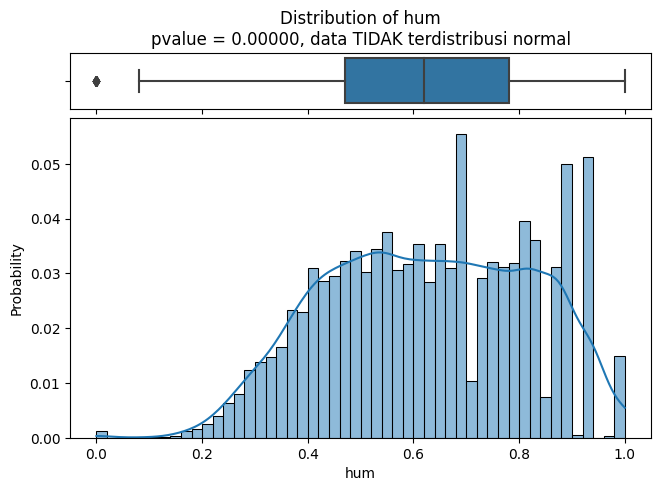

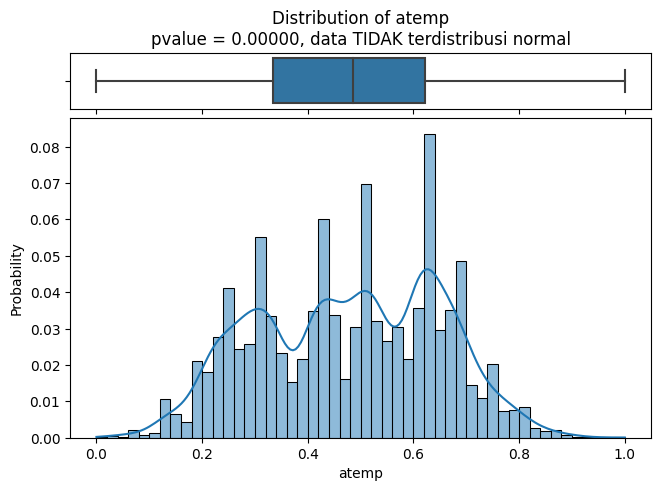

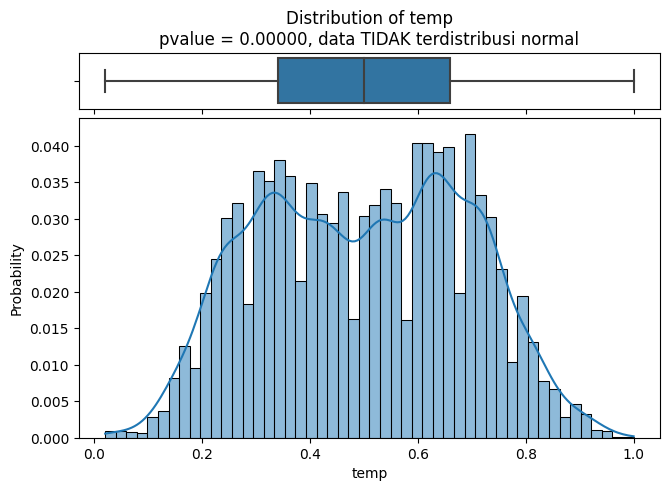

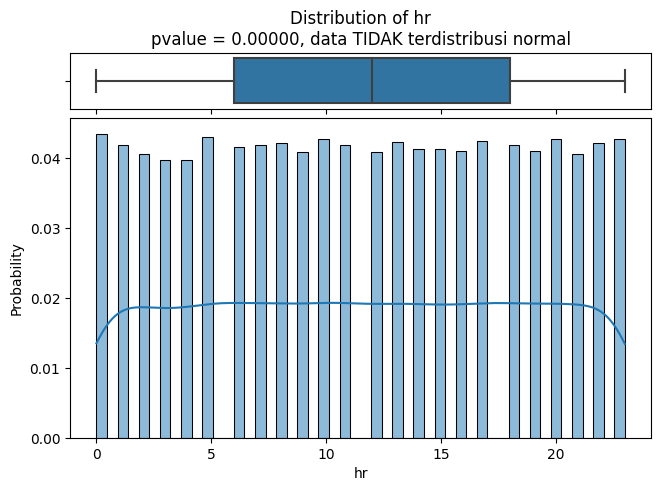

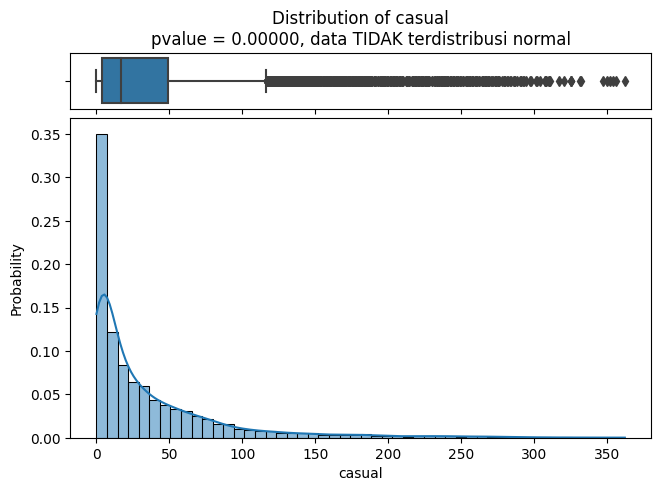

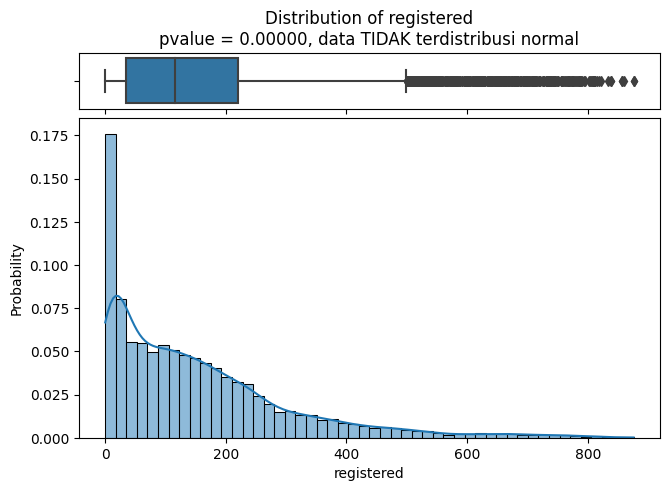

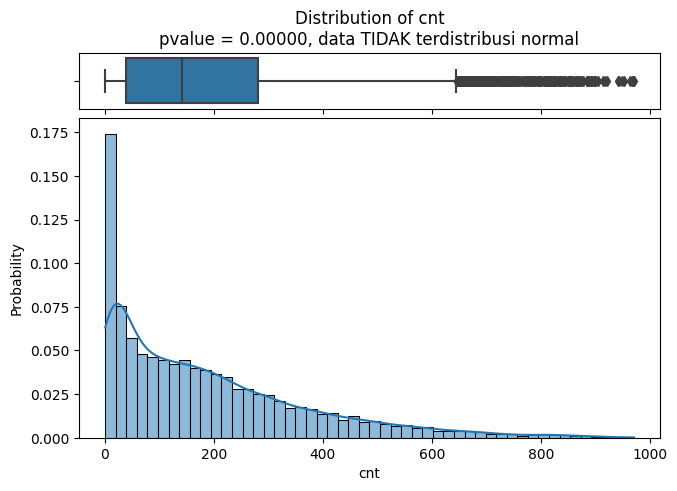

In [116]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

**Insight**

Dari data diatas bahwa dari semua data numerikal menunjukan distribusi yang tidak normal. Kemudian terdapat outlier pada beberapa kolom yang akan ditinfak lebih lanjut pada data preprocessing.

In [117]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


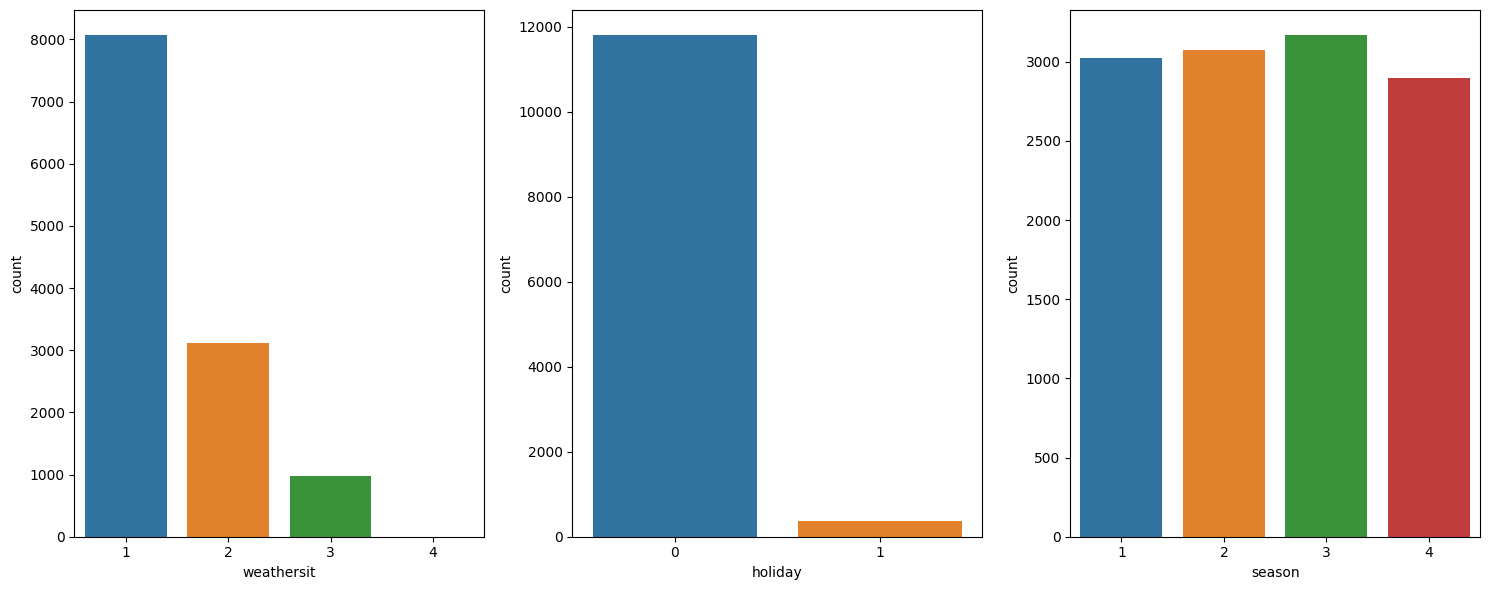

In [118]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.countplot(data=df, x='weathersit', ax=axes[0])
sns.countplot(data=df, x='holiday', ax=axes[1])
sns.countplot(data=df, x='season', ax=axes[2])
axes[0].set_xlabel('weathersit')
axes[1].set_xlabel('holiday')
axes[2].set_xlabel('season')
plt.tight_layout()
plt.show();

**Insight**

- Dari kolom weathersit sepeda paling banyak disewa pada saat cuaca Clear.
- Penyewaan/peminjaman sepeda paling banyak pada saat weekdays/saat hari kerja.
- Pada kolom season dari keempat season hampir sama rata-ratanya untuk penyewaan sepeda.

## **Data Preprocessing**

In [120]:
# Mengubah value kolom 'season' dan 'weathersit' dari numerik menjadi penamaan kategori yang sesuai
df['season'] = df['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
df['weathersit'] = df['weathersit'].replace({1:'clear', 2:'cloudy', 3:'Light snow/Light rain', 4:'Heavy rain/Snow'})

In [121]:
# Mengubah beberapa nama kolom
df = df.rename(columns={'weathersit':'weather',
                       'dteday':'date',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,date,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count
0,2011-12-09,0.62,clear,0,fall,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,clear,0,spring,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,clear,0,spring,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,cloudy,0,spring,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,clear,0,summer,0.6970,0.76,18,99,758,857


**Mengubah Tipe Data dan Memisahkan Data Kolom 'date'**

In [122]:
# Membuat kolom untuk memisahkan data Tahun, Bulan, dan Hari
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [123]:
# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category
df['holiday'] = df['holiday'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12165 non-null  datetime64[ns]
 1   humidity    12165 non-null  float64       
 2   weather     12165 non-null  object        
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hour        12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  count       12165 non-null  int64         
 11  year        12165 non-null  category      
 12  month       12165 non-null  category      
 13  day         12165 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.1+ MB


**Drop Unused Features**

- Kita akan menghilangkan fitur yang dirasa tidak perlu digunakan seperti  'casual' dan 'registered'' yang akan di total dan menjadi fitur target yaitu 'cnt', jika di pertahankan maka dikhawatirkan akan membuat model menjadi bias atau tidak sesuai.
- Kolom 'date' juga sudah tidak diperlukan karena nilai-nilai yang terdapat di dalamnya sudah diwakili dengan kolom 'year', 'month', dan 'day'


In [125]:
# Drop kolom (feature) yang tidak diperlukan
df.drop(columns=['date', 'casual', 'registered'], inplace=True)

In [126]:
df.head()

,humidity,weather,holiday,season,atemp,temp,hour,count,year,month,day
0,0.62,clear,0,fall,0.3485,0.36,16,250,2011,12,Friday
1,0.64,clear,0,spring,0.5152,0.54,4,18,2012,6,Sunday
2,0.53,clear,0,spring,0.6212,0.62,23,107,2011,6,Wednesday
3,0.87,cloudy,0,spring,0.3485,0.36,8,145,2012,3,Saturday
4,0.55,clear,0,summer,0.6970,0.76,18,857,2012,7,Tuesday


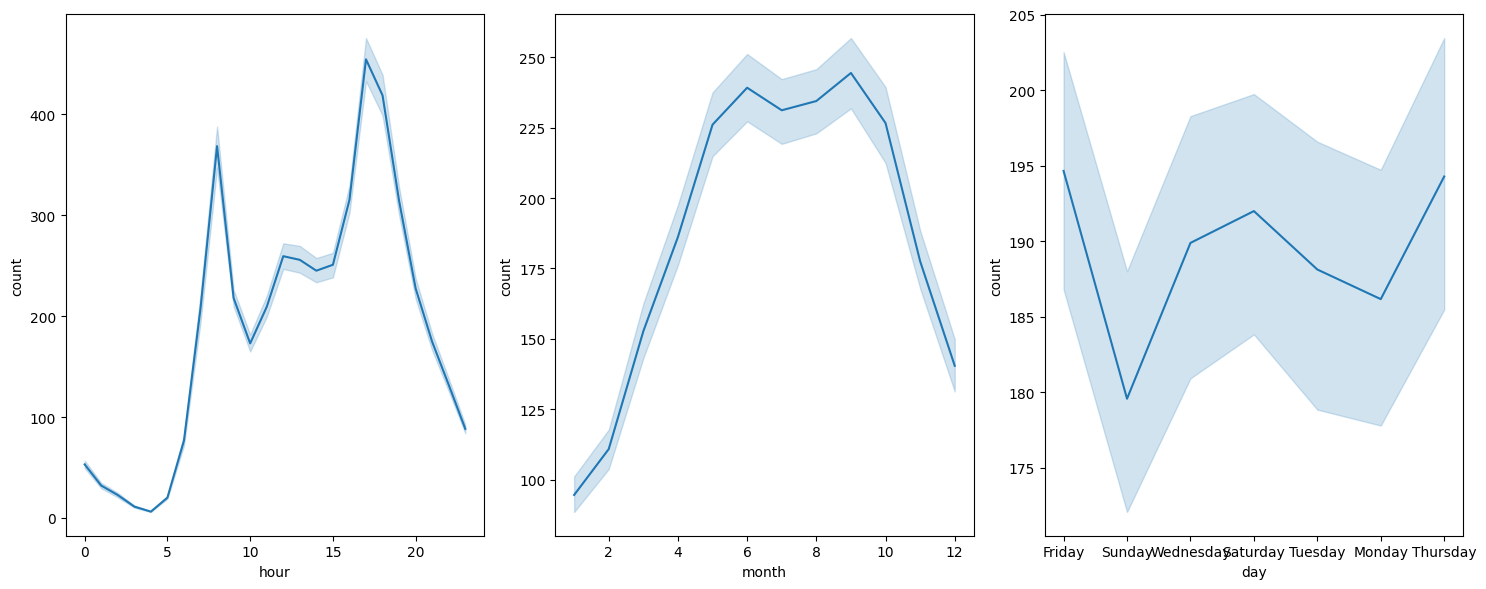

In [127]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.lineplot(data=df, x='hour', y='count', ax=axes[0])
sns.lineplot(data=df, x='month', y='count', ax=axes[1])
sns.lineplot(data=df, x='day', y='count', ax=axes[2])
axes[0].set_xlabel('hour')
axes[1].set_xlabel('month')
axes[2].set_xlabel('day')
plt.tight_layout()
plt.show();

- Jika dilihat dari jam peminjaman sepeda paling tinggi yaitu pada jam 8, jam 17, dan 18.
- Peminjaman sepeda tertinggi terjadi pada bulan Juni(6) September (9).
- Pada Friday dan Thursday menjadi hari yang paling banyak peminjaman sepeda, namun pada hari lainnya tidak terlau berbeda juga.

**Data Correlation**

In [128]:
num_features = ['humidity','atemp', 'temp', 'hour', 'count']
corr = df[num_features].corr()

In [129]:
matrix = np.triu(corr)
matrix

array([[ 1.        , -0.05178239, -0.06884151, -0.27915624, -0.31922682],
       [ 0.        ,  1.        ,  0.98735178,  0.14083497,  0.39876337],
       [ 0.        ,  0.        ,  1.        ,  0.1438673 ,  0.40114932],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.39517862],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

<Axes: >

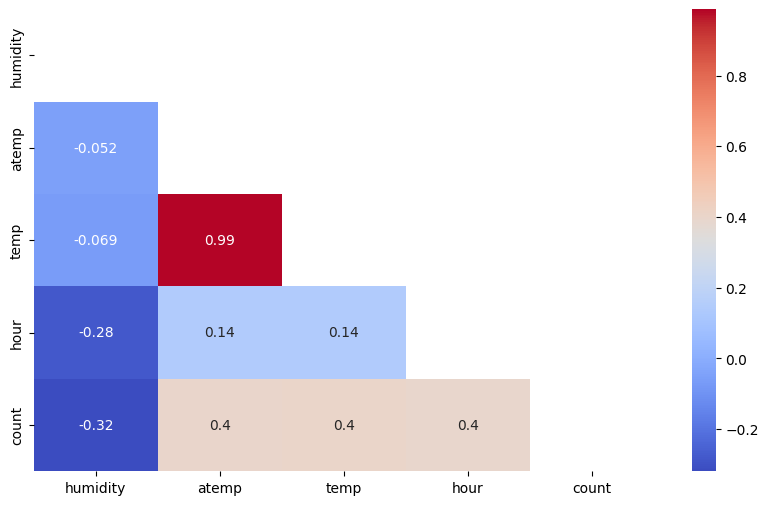

In [130]:
# melihat korelasi antar fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', mask=matrix)

Fitur temp dan atemp memiliki korelasi yang sangat tinggi. Keduanya juga merepresentasikan temperatur pada jam tersebut sehingga dapat digunakan salah satunya saja. Oleh karena itu kita akan drop salah satu yaitu temp. Hal ini didasarkan kepada domain knowledge, dimana temp berisikan nilai temperatur yang dibaca oleh termometer, sedangkan atemp berisikan nilai temperatur yang memperhitungkan suhu udara, kelembaban, dan kecepatan angin. [sumber](https://en.wikipedia.org/wiki/Apparent_temperature)

In [131]:
# Drop kolom 'temp'
df = df.drop('temp', axis=1)

**Checking Outliers**

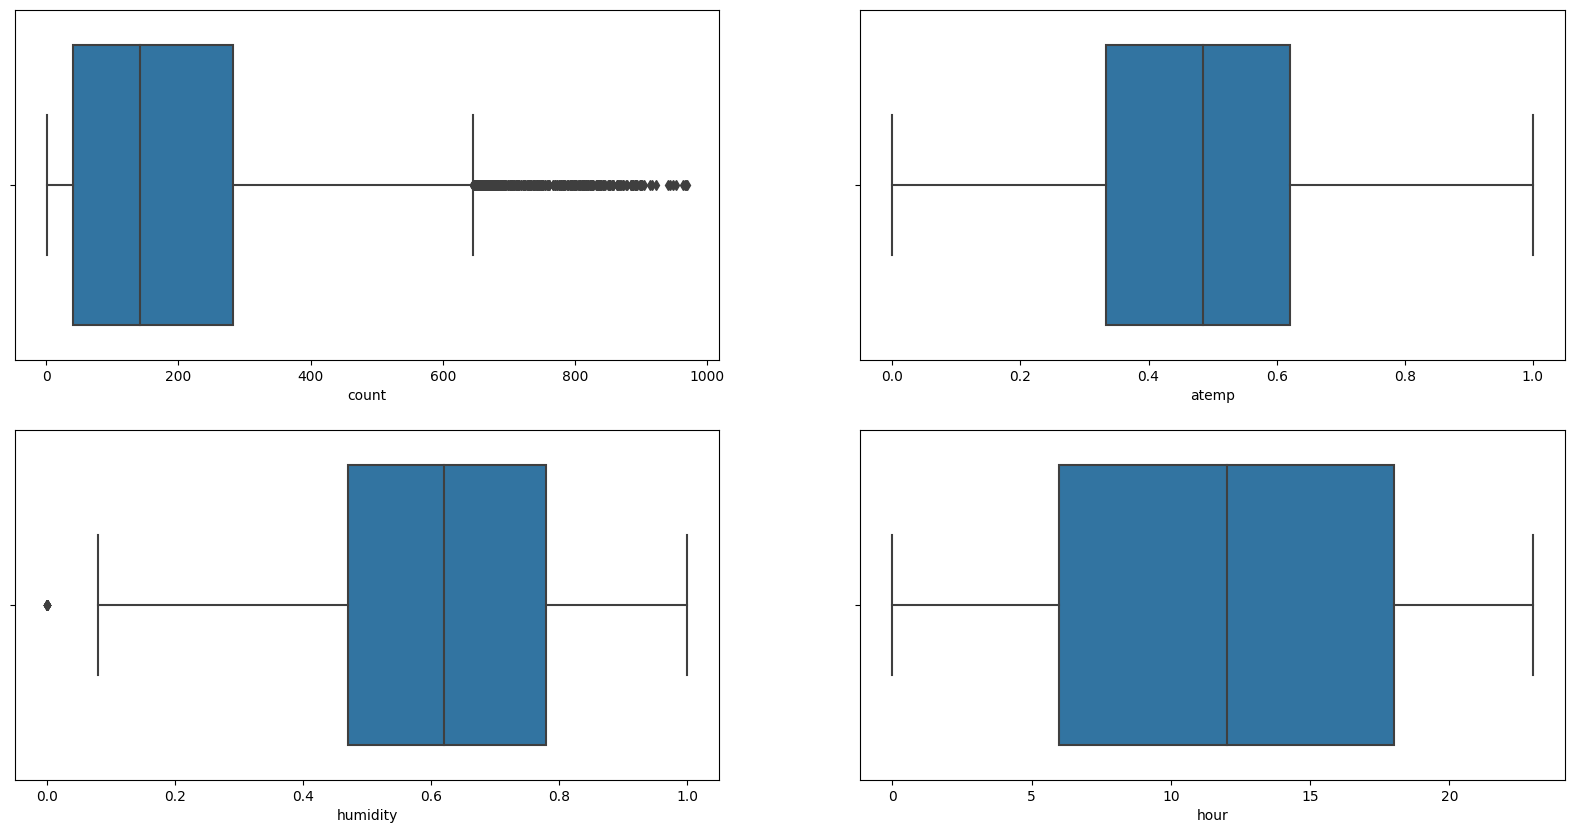

In [132]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(data=df, x='count', ax=axes[0][0])
sns.boxplot(data=df, x='atemp', ax=axes[0][1])
sns.boxplot(data=df, x='humidity', ax=axes[1][0])
sns.boxplot(data=df, x='hour', ax=axes[1][1])
plt.show()

Terdapat outlier pada kolom 'humidity' dan 'count'

In [133]:
df[df['humidity']==0]

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
345,0.0,Light snow/Light rain,0,winter,0.3939,7,37,2011,3,Thursday
871,0.0,Light snow/Light rain,0,winter,0.4394,15,14,2011,3,Thursday
1645,0.0,Light snow/Light rain,0,winter,0.3182,0,3,2011,3,Thursday
3239,0.0,cloudy,0,winter,0.4394,17,111,2011,3,Thursday
3717,0.0,cloudy,0,winter,0.3333,22,34,2011,3,Thursday
4924,0.0,Light snow/Light rain,0,winter,0.3333,6,12,2011,3,Thursday
7285,0.0,Light snow/Light rain,0,winter,0.3182,1,2,2011,3,Thursday
7760,0.0,Light snow/Light rain,0,winter,0.4242,12,34,2011,3,Thursday
8412,0.0,Light snow/Light rain,0,winter,0.3939,8,44,2011,3,Thursday
8960,0.0,Light snow/Light rain,0,winter,0.3485,23,27,2011,3,Thursday


Menurut [sumber](https://wgntv.com/weather/can-the-relative-humidity-ever-be-zero-percent/#:~:text=The%20concept%20of%20zero%20percent,if%20only%20in%20trace%20amounts) bahwa tidak mungkin kelembaban udara mencapai 0%. Kelembaban udara merujuk pada jumlah uap air yang terkandung dalam udara. Meskipun dalam kondisi sangat kering, udara masih akan mengandung sedikit uap air.

Kemudian data outliers pada kolom 'count' akan tetap kita gunakan untuk prediksi nantinya, oleh karena itu tidak akan kita drop. Juga telah dilakukan percobaan prediksi dengan melakukan menghapus outlier pada kolom 'count', namun hasilnya lebih buruk dibandingkan ketika data outliers tersebut dipertahankan.

In [134]:
# Drop feature 'humidity' yang memiliki nilai 0
df = df[df['humidity']!=0]

## **Modeling**

In [136]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

### **Encoding**

Sebelum lebih lanjut perlu untuk melakukan encoding dari feature-feature pada data ini dari kolom kategorikal menjadi numerikal dengan menggunakan Pipeline.

In [137]:
# Mengubah feature/kolom kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['weather', 'season', 'year', 'day'])
], remainder='passthrough')

### **Define Feature (X) dan Target (y)**

In [138]:
# Define Feature dan Target

X = df.drop(['count'], axis=1)
y = df['count']

### **Data Spliting**

In [ ]:
# Splitting data trai dan test dengan proporsi 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_ada, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=19)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-169.57288644 -165.88074965 -166.27776393 -159.26146598 -159.21987836] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-111.61854665 -107.84419567 -108.83572482 -105.3179493  -106.06955204] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-1.39647684 -1.29294773 -1.44383981 -1.4402324  -1.38788634] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-127.26251403 -124.50027211 -127.02024559 -120.30870899 -114.89939206] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-78.07970946 -77.52378822 -77.80849084 -74.8460228  -72.31053011] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1.21336581 -1.03620895 -1.1056603  -1.25212738 -1.06698526] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-64.59895423 -65.91894492 -71.80412885 -69.44199709 -71.66008986] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor

In [ ]:
# Membuat dataframe dari hasil semua kandidat
df_crossval = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values('Mean_MAPE', ascending=False)

df_crossval

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
5,XGBoost Regressor,-45.687780,1.529109,-27.577429,0.938036,-0.259468,0.008236
3,RandomForest Regressor,-49.839294,2.180404,-30.553516,0.559395,-0.308983,0.011418
2,DecisionTree Regressor,-68.684823,2.949576,-40.284239,0.904813,-0.427860,0.013096
4,AdaBoost Regressor,-144.219935,4.196225,-86.492888,2.750342,-0.544493,0.013368
1,KNN Regressor,-122.798227,4.674218,-76.113708,2.226969,-1.134870,0.083793
0,Linear Regression,-164.042549,4.124966,-107.937194,2.223371,-1.392277,0.054519


### **Predict to Test Set**

In [ ]:
# Benchmark 3 model terbaik
models = {
    'XGB': log_xgb,
    'RandomForest': log_rf,
    'DecisionTree' : log_dt
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,41.074083,25.589243,0.249643
RandomForest,45.597652,28.284372,0.289237
DecisionTree,59.844861,36.957342,0.406245


Setelah mencoba memprediksi kepada test set dari 3 model terbaik, dan kemudian hasil menunjukan (rangking) yang sama, maka model terbaik adalah XGBoost.

### **Extra Gradient Boost**

XGBoost adalah model ensemble yang menggabungkan prediksi dari sejumlah model lemah, dimana algoritma yang berbasis pohon seperti Decision Tree, untuk menciptakan model yang lebih kuat dan akurat. Merupakan salah satu bentuk model yang termasuk similar type ensemble method. Model ini didasarkan oleh konsep Gradient Boost, dimana serangkaian model lemah secara bertahap dikombinasikan untuk membentuk model yang lebih kuat.

Sehingga pada dasarnya memiliki algoritma yang sama dengan Gradient Boosting. Pengembangan utama pada XGBoost yaitu XGBoost memberikan penalti untuk kompleksitas model (L1 dan L2 regularization) serta memiliki komputasi yang lebih efisien dibanding Gradient Boosting. Gradient boosting, dapat dianalogikan dengan sekelompok orang dimana setiap orangnya mencoba menyelesaikan kesalahan yang dibuat oleh seseorang yang sebelumnya telah membuat keputusan. Kemudian mereka mencoba memperbaiki dan menemukan solusi terbaik untuk masalah tersebut.


### **Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest dan DecisionTree, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 3, 7)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__regressor__max_depth': max_depth, 
    'model__regressor__learning_rate': learning_rate,
    'model__regressor__n_estimators': n_estimators,
    'model__regressor__subsample': subsample,
    'model__regressor__gamma': gamma,
    'model__regressor__colsample_bytree': colsample_bytree,
    'model__regressor__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model dengan hyperparameter tuning
xgb = log_xgb

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 1000,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weather',
                                                                                'season',
                                                                                'year',
                                                                                'day'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_func=<ufunc 'exp'>...
                                                                           115,
                                                                           116,
                                                                           117,
                                                                           118,
                                                                           119,
                                                                           120,
                                                                           121,
                                                                           122,
                                                                           123,
                                                                           124,
                                                                           125,
                                                                           126,
                                                                           127,
                                                                           128,
                                                                           129, ...],
                                        'model__regressor__reg_alpha': [0.001,
                                                                        0.01,
                                                                        0.1,
                                                                        1.0,
                                                                        10.0,
                                                                        100.0,
                                                                        1000.0],
                                        'model__regressor__subsample': [0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.6,
                                                                        0.7,
                                                                        0.8,
                                                                        0.9]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
random_xgb.best_params_

{'model__regressor__subsample': 0.8,
 'model__regressor__reg_alpha': 0.001,
 'model__regressor__n_estimators': 188,
 'model__regressor__max_depth': 10,
 'model__regressor__learning_rate': 0.24,
 'model__regressor__gamma': 1,
 'model__regressor__colsample_bytree': 0.9}

In [ ]:
random_xgb.best_score_

-47.52739603339199

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE

df_hasil = pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

In [ ]:
pd.set_option('display.max_columns',None)
df_hasil

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__reg_alpha,param_model__regressor__n_estimators,param_model__regressor__max_depth,param_model__regressor__learning_rate,param_model__regressor__gamma,param_model__regressor__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
380,6.935683,0.609390,0.029505,0.001521,0.8,0.001,188,10,0.24,1,0.9,"{'model__regressor__subsample': 0.8, 'model__r...",-49.935759,-45.234704,-50.642814,-45.816682,-46.007021,-47.527396,2.280376,1,-30.318454,-28.111536,-31.169583,-28.260596,-28.134639,-29.198962,1.290924,1,-0.279014,-0.259238,-0.272066,-0.255604,-0.278262,-0.268837,0.009696,1
723,2.592313,0.095032,0.024833,0.001600,0.6,0.001,149,7,0.26,1,0.6,"{'model__regressor__subsample': 0.6, 'model__r...",-52.821959,-45.891054,-53.441934,-45.909383,-49.133068,-49.439480,3.243689,2,-31.781348,-28.749674,-33.381136,-28.801335,-29.857693,-30.514237,1.805738,2,-0.274958,-0.265499,-0.283984,-0.263557,-0.269740,-0.271548,0.007348,2
799,4.360602,0.215992,0.034290,0.002717,0.8,0.01,172,10,0.09,1,0.6,"{'model__regressor__subsample': 0.8, 'model__r...",-51.493589,-47.241810,-52.363055,-48.319503,-48.687067,-49.621005,1.962250,3,-31.295423,-29.146382,-32.486354,-30.099624,-29.800529,-30.565662,1.186472,4,-0.277026,-0.271416,-0.286083,-0.272688,-0.271356,-0.275714,0.005583,3
135,3.902859,0.273796,0.025099,0.003678,0.9,1.0,200,6,0.42,1,0.9,"{'model__regressor__subsample': 0.9, 'model__r...",-52.831958,-47.321762,-53.267349,-48.097388,-47.834255,-49.870542,2.611326,4,-31.697584,-29.414647,-33.071824,-29.862841,-28.599258,-30.529231,1.627329,3,-0.291229,-0.270098,-0.283741,-0.266338,-0.277689,-0.277819,0.009015,4
53,3.419260,0.298607,0.032255,0.007751,0.6,0.001,189,8,0.42,1,0.4,"{'model__regressor__subsample': 0.6, 'model__r...",-54.782789,-46.842661,-53.938191,-47.366738,-49.247071,-50.435490,3.313787,5,-32.551705,-29.042472,-33.292862,-29.453068,-30.398680,-30.947757,1.687475,5,-0.285225,-0.272030,-0.290829,-0.278947,-0.284100,-0.282226,0.006344,6


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -47.52739603339199
Best_params: {'model__regressor__subsample': 0.8, 'model__regressor__reg_alpha': 0.001, 'model__regressor__n_estimators': 188, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.24, 'model__regressor__gamma': 1, 'model__regressor__colsample_bytree': 0.9}


### **Predict to Test Set (with the Tuned Model)**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [ ]:
# Model XGBoost
model = {'XGB' : log_xgb}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,45.089333,27.670195,0.264453


### **Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,41.074083,25.589243,0.249643


In [ ]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,45.089333,27.670195,0.264453


Dari hasil pemodelan bahwa:

- RMSE, MAE & MAPE sebelum tuning : 41.074, 25.589, 24.964%
- RMSE, MAE & MAPE setelah tuning 1 : 45.089, 27.670, 26.445%

Bahwa setelah dituning yang pertama performa mesin menurun. Hal ini diduga bisa saja belum berhasil menmukan parameter terbaik dan pada model ini hanya melakukan 1000 model yang dicoba dengan menggunakan random search. Oleh karena ini dilakukan lagu untuk tuning kedua dengan mengubah dan mempersempit parameternya.

### **Hyperparameter Tuning 2**

In [ ]:
# Kedalaman pohon
max_depth_2 = list(np.arange(6, 11))

# Learning rate
learning_rate_2 = list(np.arange(9, 42)/100)

# Jumlah pohon
n_estimators_2 = list(np.arange(149, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample_2 = list(np.arange(6, 9)/10)


# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree_2 = list(np.arange(4, 10)/10)

# Alpha (regularization)
reg_alpha_2 = list(np.logspace(-1, 1, 3)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb_2 = {
    'model__regressor__max_depth': max_depth_2, 
    'model__regressor__learning_rate': learning_rate_2,
    'model__regressor__n_estimators': n_estimators_2,
    'model__regressor__subsample': subsample_2,
    'model__regressor__colsample_bytree': colsample_bytree_2,
    'model__regressor__reg_alpha': reg_alpha_2
}

In [ ]:
# Benchmark model dengan hyperparameter tuning
xgb_2 = log_xgb

# Membuat algorithm chains
estimator_xgb_2 = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb_2)
        ])

crossval_2 = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_xgb_2 = RandomizedSearchCV(
    estimator_xgb_2, 
    param_distributions = hyperparam_space_xgb_2,
    n_iter = 500,
    cv = crossval_2, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb_2.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weather',
                                                                                'season',
                                                                                'year',
                                                                                'day'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_func=<ufunc 'exp'>...
                                                                           153,
                                                                           154,
                                                                           155,
                                                                           156,
                                                                           157,
                                                                           158,
                                                                           159,
                                                                           160,
                                                                           161,
                                                                           162,
                                                                           163,
                                                                           164,
                                                                           165,
                                                                           166,
                                                                           167,
                                                                           168,
                                                                           169,
                                                                           170,
                                                                           171,
                                                                           172,
                                                                           173,
                                                                           174,
                                                                           175,
                                                                           176,
                                                                           177,
                                                                           178, ...],
                                        'model__regressor__reg_alpha': [0.1,
                                                                        1.0,
                                                                        10.0],
                                        'model__regressor__subsample': [0.6,
                                                                        0.7,
                                                                        0.8]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
random_xgb_2.best_params_

{'model__regressor__subsample': 0.8,
 'model__regressor__reg_alpha': 1.0,
 'model__regressor__n_estimators': 195,
 'model__regressor__max_depth': 10,
 'model__regressor__learning_rate': 0.12,
 'model__regressor__colsample_bytree': 0.9}

In [ ]:
random_xgb_2.best_score_

-42.67484886995336

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb_2.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__reg_alpha,param_model__regressor__n_estimators,param_model__regressor__max_depth,param_model__regressor__learning_rate,param_model__regressor__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
390,7.198377,0.385501,0.062907,0.007635,0.8,1.0,195,10,0.12,0.9,"{'model__regressor__subsample': 0.8, 'model__r...",-46.653316,-39.389889,-44.049548,-42.118568,-41.162924,-42.674849,2.494167,1,-27.305481,-24.705181,-26.657846,-25.546105,-24.873219,-25.817566,1.012210,1,-0.253425,-0.246020,-0.251016,-0.246665,-0.250875,-0.249600,0.002818,5
34,5.554648,0.626630,0.049276,0.006777,0.8,1.0,159,10,0.12,0.9,"{'model__regressor__subsample': 0.8, 'model__r...",-46.675701,-39.471521,-44.269973,-42.131967,-41.053470,-42.720526,2.518956,2,-27.346689,-24.758199,-26.822480,-25.469127,-24.823434,-25.843985,1.056082,2,-0.253703,-0.245675,-0.251763,-0.246189,-0.250680,-0.249602,0.003154,6
127,5.280384,0.323176,0.045004,0.002567,0.8,1.0,195,8,0.09,0.9,"{'model__regressor__subsample': 0.8, 'model__r...",-46.358528,-40.276091,-44.588532,-41.637485,-41.199714,-42.812070,2.286644,3,-27.191914,-24.972145,-27.029377,-25.613777,-24.788537,-25.919150,1.012017,5,-0.252239,-0.238751,-0.251940,-0.243507,-0.245923,-0.246472,0.005135,1
15,5.219343,0.339318,0.054049,0.006638,0.7,0.1,200,9,0.09,0.8,"{'model__regressor__subsample': 0.7, 'model__r...",-46.669102,-40.654836,-44.954020,-41.313596,-41.639345,-43.046180,2.343714,4,-27.354899,-24.799104,-27.134486,-25.236325,-24.930161,-25.890995,1.116540,4,-0.256899,-0.245763,-0.256817,-0.244233,-0.249611,-0.250664,0.005352,14
440,5.223501,0.288186,0.054467,0.003975,0.8,0.1,158,10,0.09,0.8,"{'model__regressor__subsample': 0.8, 'model__r...",-47.212665,-39.866529,-45.297703,-41.755694,-41.876927,-43.201904,2.662720,5,-27.517028,-24.468177,-27.062568,-25.282617,-25.119644,-25.890007,1.183729,3,-0.256678,-0.245580,-0.260569,-0.248868,-0.252195,-0.252778,0.005354,37


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb_2.best_score_)
print('Best_params:', random_xgb_2.best_params_)

XGBoost
Best_score: -42.67484886995336
Best_params: {'model__regressor__subsample': 0.8, 'model__regressor__reg_alpha': 1.0, 'model__regressor__n_estimators': 195, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.12, 'model__regressor__colsample_bytree': 0.9}


### **Predict to Test Set (with the Tuned Model) 2**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [ ]:
# Model XGBoost
model_2 = {'XGB' : log_xgb}

# Define model terhadap estimator terbaik
xgb_tuning_2 = random_xgb_2.best_estimator_

# Fitting model
xgb_tuning_2.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning_2 = xgb_tuning_2.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning_2 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning_2))
mae_xgb_tuning_2 = mean_absolute_error(y_test, y_pred_xgb_tuning_2)
mape_xgb_tuning_2 = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_2)

score_after_tuning_2 = pd.DataFrame({'RMSE': rmse_xgb_tuning_2, 'MAE': mae_xgb_tuning_2, 'MAPE': mape_xgb_tuning_2}, index=model.keys())
score_after_tuning_2

,RMSE,MAE,MAPE
XGB,39.582126,24.215756,0.248437


### **Performance Comparison 2**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,41.074083,25.589243,0.249643


In [ ]:
# Setelah hyperparameter tuning
score_after_tuning_2

,RMSE,MAE,MAPE
XGB,39.582126,24.215756,0.248437


Dari hasil pemodelan bahwa:

- RMSE, MAE & MAPE sebelum tuning : 41.074, 25.589, 24.964%
- RMSE, MAE & MAPE setelah tuning 1 : 45.089, 27.670, 26.445%
- RMSE, MAE & MAPE setelah tuning 2 : 39.582, 24.215, 24.843%

Bahwa setelah dituning kedua bahwa perfomra meningkat dibandingkan dengan tuning pertama.

### **Analisis Nilai Prediksi, Nilai Aktual, dan Error**

**Visualisasi Y Prediksi VS Y Aktual**

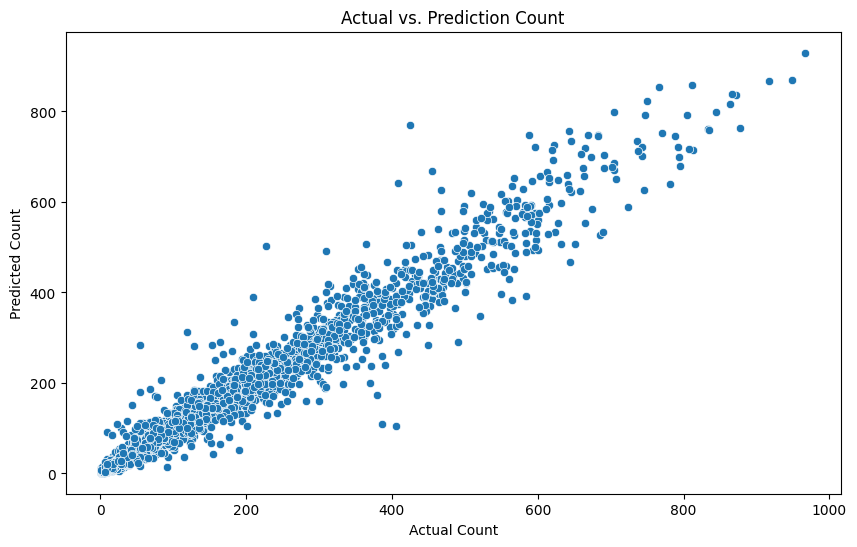

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning_2).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

**Insight**

Dari hasil grafik diatas bahwa pemodelan cukup bisa bekerja secara efektif namun masih terdapat beberapa hasil prediksi yang sedikit menyimpang baik lebih tinggi (overestimation) atau lebih rendah (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 29% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

In [153]:
dftarget = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_xgb_tuning_2})

df50 = dftarget[dftarget['Actual Count'] <=50]
df100 = dftarget[(dftarget['Actual Count']>50) & (dftarget['Actual Count']<=100)]
df150 = dftarget[(dftarget['Actual Count']>100) & (dftarget['Actual Count']<=150)]
df200 = dftarget[(dftarget['Actual Count']>150) & (dftarget['Actual Count']<=200)]
df250 = dftarget[(dftarget['Actual Count']>200) & (dftarget['Actual Count']<=250)]
df300 = dftarget[(dftarget['Actual Count']>250) & (dftarget['Actual Count']<=300)]
df350 = dftarget[(dftarget['Actual Count']>300) & (dftarget['Actual Count']<=350)]
df400 = dftarget[(dftarget['Actual Count']>350) & (dftarget['Actual Count']<=400)]
df450 = dftarget[(dftarget['Actual Count']>400) & (dftarget['Actual Count']<=450)]
df500 = dftarget[(dftarget['Actual Count']>450) & (dftarget['Actual Count']<=500)]
df550 = dftarget[(dftarget['Actual Count']>500) & (dftarget['Actual Count']<=550)]
df600 = dftarget[(dftarget['Actual Count']>550) & (dftarget['Actual Count']<=600)]
df600plus = dftarget[dftarget['Actual Count']>600]

target_range = [df50, df100, df150, df200, df250, df300, df350, df400, df450, df500, df550, df600, df600plus, dftarget]
index_range = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '>600', 'All Count Range (Max 970)']
mae = []
mape = []
for target in target_range:
    scoremae = mean_absolute_error(target['Actual Count'], target['Predicted Count'])
    scoremape = mean_absolute_percentage_error(target['Actual Count'], target['Predicted Count'])
    mae.append(scoremae)
    mape.append(scoremape)

range_metrics = pd.DataFrame({
              "Score MAE": mae,
              "Score MAPE": mape}, index=index_range)
range_metrics

,Score MAE,Score MAPE
<=50,6.768524,0.498611
51-100,18.298062,0.257930
101-150,19.209972,0.156747
151-200,25.035339,0.144105
201-250,27.727806,0.124606
251-300,29.119760,0.105496
301-350,37.687135,0.117196
351-400,45.851300,0.123191
401-450,53.224147,0.126142
451-500,51.580203,0.108900


Berdasarkan hasil pengelompokkan target tersebut terlihat bahwa untuk target dengan jumlah unit sepeda yang disewa kurang atau sama dengan 50 memiliki nilai MAPE yang cukup besar yaitu sekitar 49.8% atau dibulatkan menjadi 50%,. Hasil pengelompokkan tersebut, bisa dilihat limitasi model dapat memprediksi dengan baik untuk jumlah unit sepeda di atas 50 unit, dengan hasil nilai MAPE yang masih cukup baik dan reasonable. Jika berdasarkan [sumber](https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432) didominasi score MAPE pada grafik diatas termasuk kedalam 'good forecasting', namun untuk secara keseluruhan termasuk 'reasonable forecasting'.

In [ ]:
# Plot feature importances
feature_imp = pd.DataFrame(xgb_tuning_2['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).reset_index().rename(columns={'index' : 'Feature', 0 : 'Importance'})
top_feature = feature_imp.sort_values('Importance',ascending=False)
top_feature

,Feature,Importance
16,remainder__hour,0.413486
9,One Hot__day_Sunday,0.121066
8,One Hot__day_Saturday,0.103419
6,One Hot__year_2012,0.094150
5,One Hot__season_winter,0.092827
15,remainder__atemp,0.038548
0,One Hot__weather_Light snow/Light rain,0.030107
14,remainder__holiday,0.028337
17,remainder__month,0.012624
13,remainder__humidity,0.011382


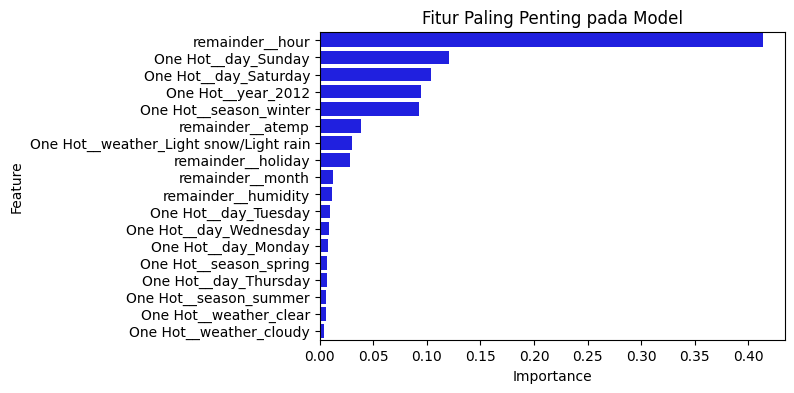

In [154]:
plt.figure(figsize=(6,4))
sns.barplot(data=top_feature,x='Importance', y='Feature', color='b')
plt.title('Fitur Paling Penting pada Model')
plt.show()

Dari hasil grafik diatas dapat dilihat bahwa 5 feature yang paling penting pada pemodelan ini adalah 'hour', 'day_Sunday', 'day_Saturday', 'year_2012' dan 'season_winter'. Namun feature 'hour' sangat mempengaruhi target ('count') karena memiliki nilai Feature Importances yang jauh lebih tinggi dibanding fitur lainnya.

## **Conslusion**

- Berdasarkan pemodelan yang sudah dilakukan, fitur 'hour' menjadi fitur yang paling berpengaruh terhadap target ('count').

- Hyperpamater tuning kedua membuat performa model meningkat:
    - RMSE, MAE & MAPE sebelum tuning : 41.074, 25.589, 24.964%
    - RMSE, MAE & MAPE setelah tuning 1 : 45.089, 27.670, 26.445%
    - RMSE, MAE & MAPE setelah tuning 2 : 39.582, 24.215, 24.843%
    
&ensp;
- Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~24%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan jumlah sepeda yang didistribusikan pada rentang nilai seperti yang dilatih terhadap model (maksimal 970 sepeda), maka perkiraan jumlah unit rata-ratanya akan meleset kurang lebih sebesar 24% dari jumlah unit seharusnya. 

- Model yang dipilih adalah model XGBosst yang sudah di tranfformasi ke skala logaritmik, kemudian ditransformasi kembali ke fungsi inverse. Parameter tuning terbaik pada model XGBoost ini adalah:
    - 'model__regressor__subsample': 0.8,
    - 'model__regressor__reg_alpha': 1.0,
    - 'model__regressor__n_estimators': 195,
    - 'model__regressor__max_depth': 10,
    - 'model__regressor__learning_rate': 0.12,
    - 'model__regressor__colsample_bytree': 0.9

&ensp;
- Limitasi pada model ini adalah:
    | **Fitur** | **Tipe Data** | **Limitasi** |
    | --- | --- | --- |
    | humidity | float | Semua nilai unik kolom 'humidity' pada dataset (88 tipe humidity) |
    | weather | object | Semua nilai unik kolom 'weather' pada dataset (4 weather, clear, cloudy, light snow/light rain, heavy rain/snow)|
    | holiday | category | Semua nilai unik kolom 'holiday' pada dataset (2 tipe, holiday/tidak) |
    | season | object | Semua nilai unik kolom 'season' pada dataset (4 tipe, spring fall, summer, winter) |
    | atemp | float | Semua nilai unik kolom 'float' pada dataset (65 tipe atemp) |
    | hour | integer | Semua nilai unik kolom 'hour' pada dataset (24 tipe waktu) |
    | count | integer | Semua nilai unik kolom 'count' pada dataset (830 tipe ) |
    | year | category | Semua nilai unik kolom 'year' pada dataset (2 tipe, 2011-2012) |
    | month | category | Semua nilai unik kolom 'month' pada dataset (12 tipe, Januari-Desember) |
    | day | object | Semua nilai unik kolom 'day' pada dataset (7 tipe hari) | 
&ensp;
 

## **Recomendation**

- Melakukan penambahan feature yang mempunyai korelasi terhapat target itu sendiri, seperti wilayah/region, kemduian lokasi-lokasi stasiun tempat penyewaan sepeda dari wilayah/region tersebut, lama waktu penyewaan sepeda, titik awal penyewaan sepeda, titik akhir pengembalian sepeda hal ini bisa untuk menambah keakuratan performa pada model.

- Penambahan dataset, mengingat pada dataset ini hanya pada periode 2011-2012. Dengan manambah dataset pada periode tertentu mesin dapat mempelajari pola-pola tambahan agar bisa memprediksi lebih akurat.

- Mengoptimalkan parameter yang dilakukan pada saat tuning, karena adanya limitasi yang dimiliki sehingga paramater yang digunakan dengan cara mencoba trial dan error.

- Mencoba dengan peforma model lain yang tidak digunakan pada model ini, seperti Lasso, Ridge ataupun pemodelan yang lebih kompleks lainnya. Hal ini memungkinkan untuk adanya model yang mempunya peluang menjadi yang terbaik pada dataset ini.

- Selain bisa untuk memprediksi jumlah sepeda yang perlu didistribusikan atau memprediksi demand penyewaan sepeda, model ini juga bisa ketika hasil prediksi jumlah sepeda yang perlu didistribusikan tidak terlalu tinggi, maka penyedia bisa melakukan perbaikan sepeda atau station yang memang perlu dilakukan. Sehingga tidak bertabrakan ketika demand tinggi dan perlu dilakukan maintenance.

## **Save Model**

In [156]:
import pickle

In [ ]:
random_xgb_2.best_estimator_

In [157]:
# saving model

# best model
final_model = random_xgb_2.best_estimator_

# fitting to all data
final_model.fit(X, y)

# save
pickle.dump(final_model, open('model_xgboost_for_bikesharing_regression.sav', 'wb'))

In [158]:
# Load model
filename = 'model_xgboost_for_bikesharing_regression.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

23.737334776048876